# Classificação de Vidros

Esta base de dados é de origem do Kaggle (disponível em: https://www.kaggle.com/uciml/glass). Este trabalho faz a exploração dos dados para obter *insights*, analisa e treina modelos de *Machine Learning* (ML); e faz a avaliação dos modelos. Este *Jupyter Notebook* está dividido nos seguintes tópicos:

1. Análise Exploratória dos Dados (EDA)
2. Visualização de Dados
3. Pré processamento
4. Modelo de *Machine Learning*
5. Resultados

### Importando bibliotecas

In [71]:
#data manipulation
import numpy as np
import pandas as pd

#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

#set color pallete to pictures
sns.set_palette(palette='YlGnBu')
sns.set_style('darkgrid')

#Reading data
file_path = './data/glass.csv'
df = pd.read_csv(file_path)

## 1. Análise Exploratória dos Dados

É possível observar que os dados são unicamente numéricos.

In [2]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


A base de dados possui 214 entradas e 10 colunas. Todos os atributos são números flutuantes, a coluna 'Type' é do tipo inteiro e não existem campos vazios, como mostra abaixo *non-null* para todos os atributos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# Mostrar as colunas
print('Colunas: {}'.format(df.columns.values))

#Mostrar a quantidade de amostras de cada classe
print('Classes: {}'.format(df['Type'].unique()))

Colunas: ['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
Classes: [1 2 3 5 6 7]


A base de dados possui 10 colunas, sendo as 9 primeiras as features e a última o tipo de vidro. Cada feature significa:
* RI - Índice de Fefração
* Na - Sódio (unidade de medida: peso percentual no óxido correspondente, como o restante das features)
* Mg - Magnésio
* Al - Alumínio
* Si -Silício
* K - Potássio
* Ca - Cálcio
* Ba - Bário
* Fe - Ferro

As classes correspondem de 1 a 7 para cada tipo de vidro, tal que:
* 1 - construção de janelas flutuante processado
* 2 - building_windows_non_float_processed 
* 3 - vehicle_windows_float_processed 
* 4 - vehicle_windows_non_float_processed
* 5 - containers 
* 6 - tableware 
* 7 - headlamps

Percebe-se que na saída do código acima, em "Classes", não há o tipo 4. Isto é, não existe amostra para a classe 4.

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## 2. Visualização de Dados

Primeiramente, vamos investigar a quantidade de vidros por tipo:

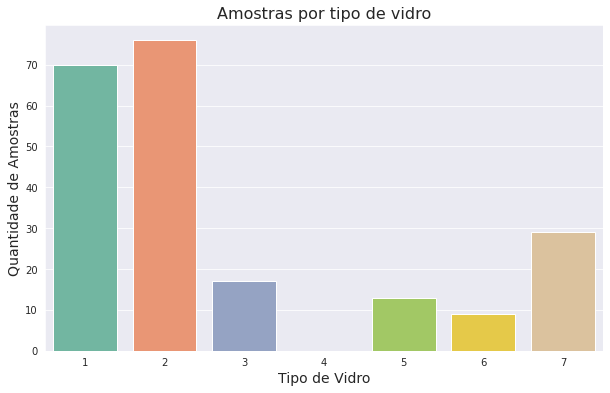

In [103]:
plt.figure(figsize=(10,6))
plt.title('Amostras por tipo de vidro', fontsize=16)
sns.countplot(x='Type',data=df, order=[1,2,3,4,5,6,7],palette='Set2')
plt.xlabel('Tipo de Vidro', fontsize=14)
plt.ylabel('Quantidade de Amostras', fontsize=14)
plt.savefig('./figures/amostras.png')

É perceptível que as classes 1 e 2 possuem mais amostras. Além disso, não existe amostra para a classe 4. Por haver quantidades diferentes de vidro por classe é preciso ter cuidado para modelar e pesar classes desbalanceadas.

Agora queremos investigar se há alguma correlação entre os elementos químicos na composição do vidro. Para isto, foi criada uma matriz de correlação que consiste em calcular em termos percentuais a taxa de correlação linear entre duas variáveis. Para melhor visualização dessa matriz, vamos visualizá-la em um mapa de calor:

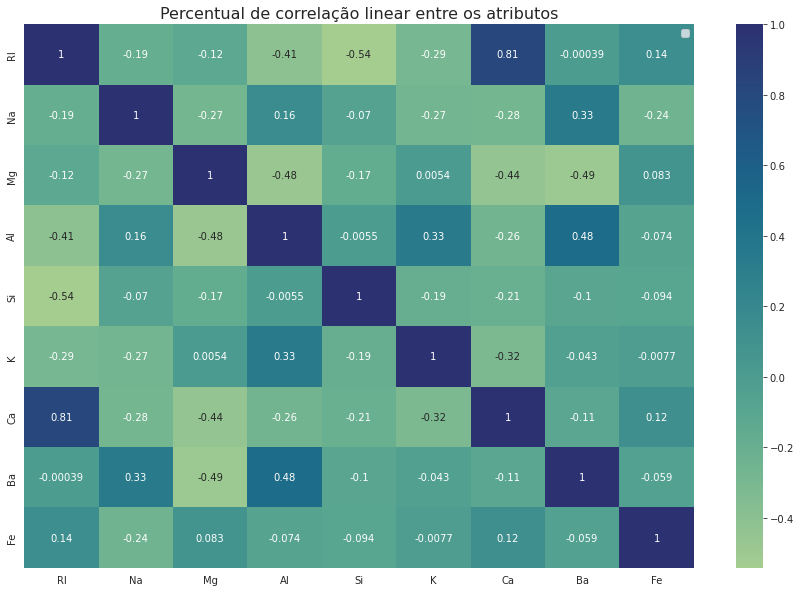

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('Type',axis=1).corr(), annot=True, cmap='crest')
plt.title('Percentual de correlação linear entre os atributos', fontsize=16)
plt.legend('Oi')

Pode-se perceber que os elementos mais escuros possuem maior correlação, os mais claros correlação inversa e os intermediários possuem pouca correlação linear. Por exemplo, a maior correlação de atributos são o Índice de Refração (RI) e o elemento Cálcio (Ca) de valor 0.81. Por outro lado, o Índice de Refração (RI) e o Silício (Si) possui o valor mais negativo de -0.51, sugerindo uma correlação inversa.

Vamos olhar mais de perto essas duas correlações citadas:

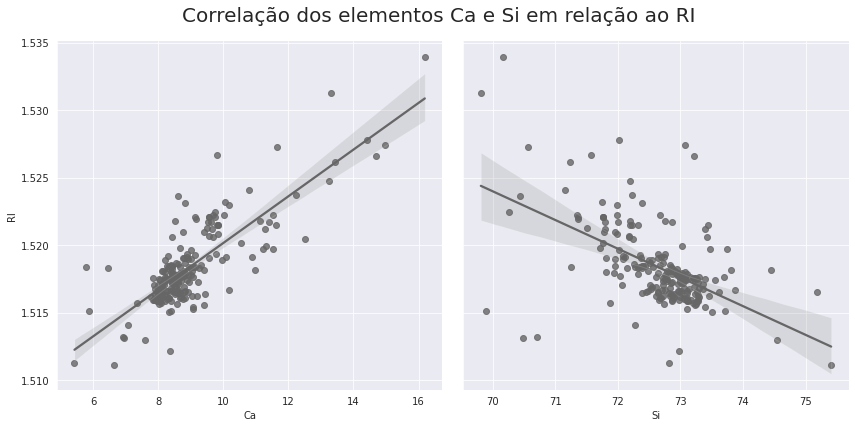

In [13]:
g = sns.PairGrid(df, y_vars=["RI"], x_vars=["Ca", "Si"], height=6, palette='crest')
g.map(sns.regplot, color=".4")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Correlação dos elementos Ca e Si em relação ao RI', fontsize=20)
plt.savefig('./figures/elementos_corr.png')

De fato, para o primeiro exemplo entre Ca e RI a tendência linear é de aumento entre as duas variáveis, ao passo que, o segundo exemplo entre Si e RI é de tendência linear negativa entre as duas variáveis.

## 3. Pré processamento

Como vamos trabalhar com alguns algoritmos de ML lineares é preciso que estes dados sejam preprocessados. Para isto vamos utilizar StandScaler para esta tarefa e utilizar o X_scaled para os algoritmos de ML que precisarem mesmo. Para árvores de decisão isto não será necessário.

Além disso, vamos separar os dados de treinamento e teste. Os dados de teste serão salvos em X_test e y_test. Os dados de treinamento em X_train e y_train e estes serão usados para treinar e testar os algoritmos durante o treinamento. Ao final de tudo, e apenas no final, verificamos todos os modelos com os dados jamais vistos, X_test e y_test.

In [48]:
# Dados originais
X = df.drop(labels='Type',axis=1)
y = df['Type']

# Dividindo em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=101)

# Dados utilizados durante o treinamento dos modelos
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.3, random_state=101)

# Dados escalados no X_scaled
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)

print(f'Tamanho dos dados de treinamento: {len(X_train)}')

Tamanho dos dados de treinamento: 149


## 4. Treinamento de Modelos de Machine Learning

### 4.1 Decision Trees

Primeiro vamos utilizar uma árvore de decisão e avaliar suas características. Como a base de dados é pequena, vamos procurar os melhores parâmetros que generalizem a classificação (queremos evitar o overfitting e underfitting). Para isto, vamos testar a profundidade da árvore e comparar o *score* do treino e do teste.

In [61]:
param_grid = [2, 4, 5, 6, 8]
depth = {'two': 0, 'four': 1, 'five': 2, 'six': 3, 'eight': 4}
classifiers = []

for max_depth in param_grid:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=101)
    clf.fit(X_train_val, y_train_val)
    print(f'DecisionTree - max_depth={max_depth} | train_score={clf.score(X_train_val, y_train_val):.2f} | \
test_score={clf.score(X_test_val, y_test_val):.2f}')
    
    classifiers.append(clf)

DecisionTree - max_depth=2 | train_score=0.54 | test_score=0.51
DecisionTree - max_depth=4 | train_score=0.81 | test_score=0.62
DecisionTree - max_depth=5 | train_score=0.88 | test_score=0.67
DecisionTree - max_depth=6 | train_score=0.94 | test_score=0.67
DecisionTree - max_depth=8 | train_score=1.00 | test_score=0.64


Temos diferentes *scores* em cada árvore de decisão. As árvores mais promissoras são as de profundidade 4 e 5 pois foram bem no treinamento e razoavelmente bem no teste.

A primeira árvore ficou próximo a 50% e já está descartada. As árvores de profundidade 7 e 8 decoraram os dados e tiveram baixa performance no teste, logo houve overfitting.

Para decidir entre profundidade 4 e 5, vamos realizar a validação cruzada nos mesmos dados.

#### Decision Tree - Validação Cruzada

Pela validação cruzada, o modelo de profundidade 5 obteve 62% de acurácia no pior dos treinamentos. Logo, é o modelo de árvore de decisão que vamos escolher.

In [64]:
cvs_four = cross_val_score(classifiers[depth['four']], X_train, y_train, cv=5, scoring='accuracy')
cvs_five = cross_val_score(classifiers[depth['five']], X_train, y_train, cv=5, scoring='accuracy')

print(f'Depth four scores: {cvs_four}')
print(f'Depth five scores: {cvs_five}')

Depth four scores: [0.66666667 0.7        0.7        0.66666667 0.55172414]
Depth five scores: [0.8        0.7        0.8        0.7        0.62068966]


#### Avaliação da Decision Tree de profundidade 5

Apenas a acurácia não é uma métrica completa para avaliação de modelos de classificação. Para isto, vamos comparar as predições do modelo com as classes reais, e verificar qual a porcentagem de acerto para cada classe. Para isto, vamos utilizar uma matriz de confusão.

<AxesSubplot:title={'center':'Classe vs Predição do Modelo'}>

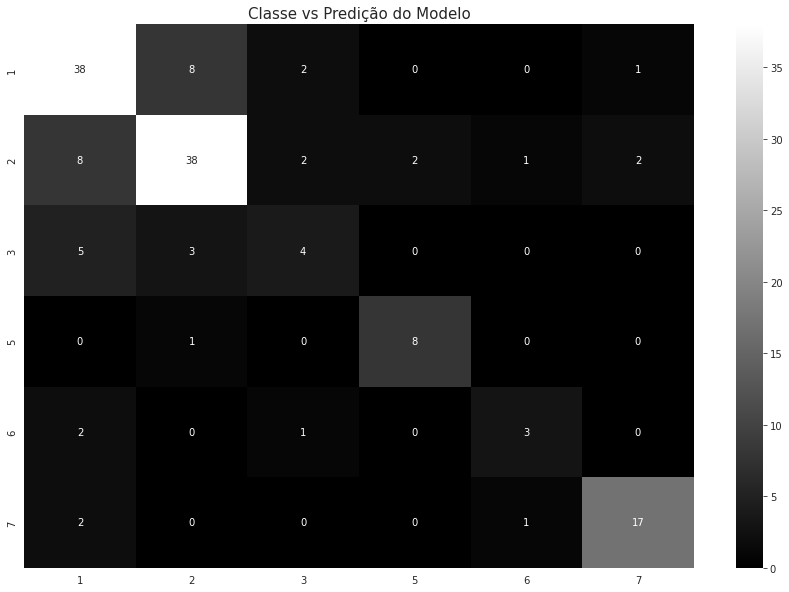

In [104]:
# predições do modelo
y_train_pred = cross_val_predict(classifiers[depth['five']], X_train, y_train, cv=5)

# matriz de confusão: valores das classes vs predições do modelo
conf_mx = confusion_matrix(y_train, y_train_pred)

# Criando figura da matriz de confusão para melhor visualização
labels = [1, 2, 3, 5, 6, 7]
plt.figure(figsize=(15,10))
plt.title('Classe vs Predição do Modelo', fontsize=15)
sns.heatmap(conf_mx, annot=True, xticklabels=labels, yticklabels=labels, cmap='gray')

Observe a matriz de confusão acima. As linhas indicam a classe e as colunas indicam a predição do modelo. Uma matriz próxima do ideal teria a maioria dos valores na diagonal principal, da esquerda pra direita começando do 1 para o 7. Para as classes 1 e 2 o modelo teve uma ótima performance. Além disso, as classes 1 e 2 também são as que mais possuem dados. As classes 3 e 6 foram as que tiveram menor taxa de acertos neste modelo.

Para visualizar melhor, vamos ignorar a diagonal principal e olhar a taxa de predições por classe. Para isto, vamos pegar a predição feita pelo modelo e dividir pelo total de amostras da respectiva classe.

<AxesSubplot:title={'center':'Taxa de predição por classe'}>

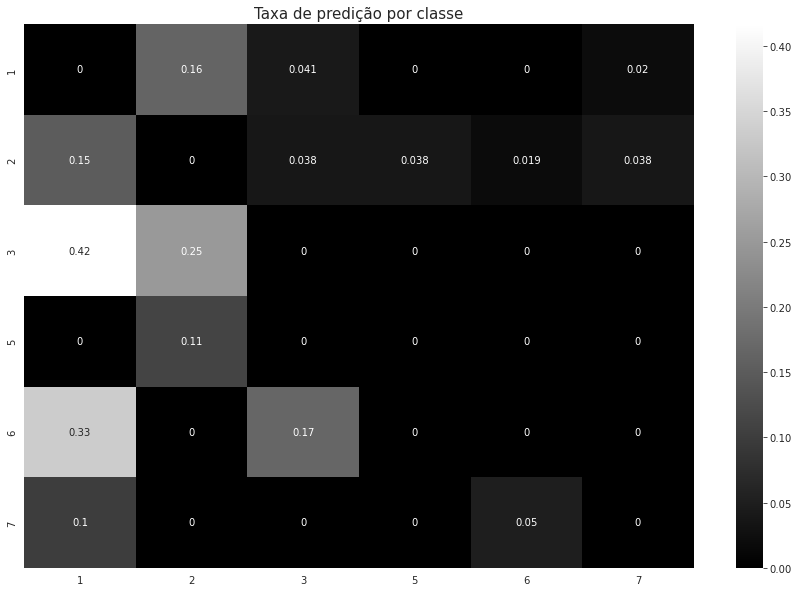

In [105]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
labels = [1, 2, 3, 5, 6, 7]
plt.figure(figsize=(15,10))
plt.title('Taxa de predição por classe', fontsize=15)
sns.heatmap(norm_conf_mx, annot=True, xticklabels=labels, yticklabels=labels, cmap='gray')

A partir da Figura, podemos observar que as colunas 1 e 2

<AxesSubplot:title={'center':'Importância de variáveis'}>

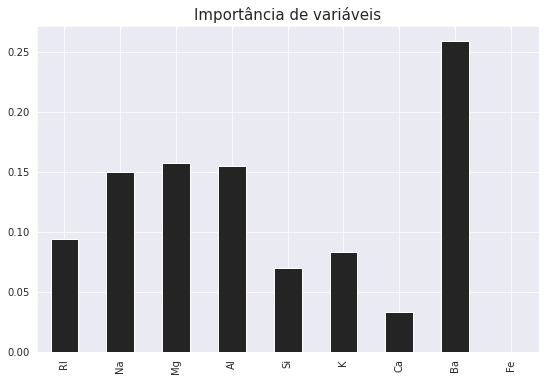

In [101]:
dt = classifiers[depth['five']]
df_decisionTree = pd.Series(dt.feature_importances_, index=df.columns.values[0:-1])

plt.figure(figsize=(9,6))
plt.title('Importância de variáveis', fontsize=15)
sns.set_palette('gray')
df_decisionTree.plot(kind='bar')

### 4.2 Regressão Logística

In [15]:
from sklearn.linear_model import LogisticRegression

#Test parameters
C = [0.01, 0.1, 1.0, 10, 100]
classifiers = []

for c in C:
    clf = LogisticRegression(C=c, random_state=101, n_jobs=-1, max_iter=1000)
    clf.fit(X_scaled, y)
    
    print('Logistic Regression C={} | train_score={} | test_score={}'.format(c, clf.score(X_train, y_train) \
                                                                        ,clf.score(X_test, y_test)))
    
    classifiers.append(clf)

Logistic Regression C=0.01 | train_score=0.6375838926174496 | test_score=0.5692307692307692
Logistic Regression C=0.1 | train_score=0.6778523489932886 | test_score=0.6153846153846154
Logistic Regression C=1.0 | train_score=0.7046979865771812 | test_score=0.676923076923077
Logistic Regression C=10 | train_score=0.7181208053691275 | test_score=0.6923076923076923
Logistic Regression C=100 | train_score=0.7583892617449665 | test_score=0.6615384615384615


In [16]:
#Choose LogisticRegression
lr=classifiers[3]
lr_preditions = lr.predict(X_test)

### 4.3 Random Forest

## 5. Validação

Temos dois modelos em mãos: O que escolher?



In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf1 = classification_report(dt_predictions, y_test)
conf2 = classification_report(lr_preditions, y_test)

/home/bombadil/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bombadil/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bombadil/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
print("Decision Tree Classification Report")
print(conf2)

Decision Tree Classification Report
              precision    recall  f1-score   support

           1       0.67      0.64      0.65        22
           2       0.70      0.62      0.65        26
           3       0.00      0.00      0.00         0
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       1.00      0.90      0.95        10

    accuracy                           0.69        65
   macro avg       0.69      0.65      0.67        65
weighted avg       0.75      0.69      0.72        65



In [19]:
print("Logistic Regression Classification Report")
print(conf1)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       0.67      0.70      0.68        20
           2       0.74      0.68      0.71        25
           3       0.40      0.40      0.40         5
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         3
           7       0.78      0.88      0.82         8

    accuracy                           0.71        65
   macro avg       0.72      0.73      0.73        65
weighted avg       0.71      0.71      0.71        65



Nos dois modelos acima é notório que ambos classificam razoavelmente bem todas as classes, exceto a classe 3. A classe 3 teve o pior resultado. Logo, este modelo serve bem para as classes 1, 2, 5, 6 e 7. Para classificar bem a classe 3 deveria-se ajustar o modelo para melhorar a acurácia nesta classe específica.

#### Salvando Modelos no Disco

In [20]:
import joblib

joblib.dump(dt, './models/DecisionTree.joblib')

['./models/DecisionTree.joblib']

In [21]:
clf = joblib.load('./models/DecisionTree.joblib')

In [22]:


clf.predict_proba([[1.516,12.1,0.75,0.7,69,1.25,7.4,0.8,0.1]])[0]

array([0., 0., 0., 0., 0., 1.])

<AxesSubplot:title={'center':'Importância de variáveis'}>

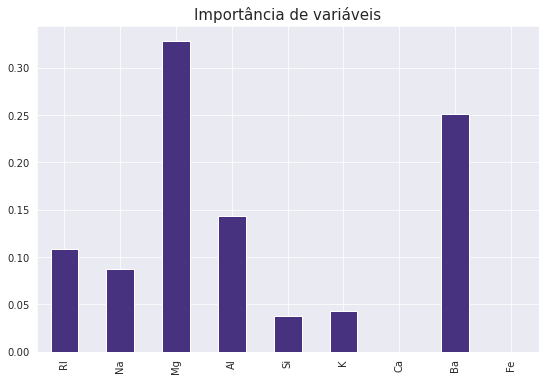

In [23]:
df_decisionTree = pd.DataFrame(clf.feature_importances_, index=df.columns.values[0:-1])

plt.figure(figsize=(9,6))
plt.title('Importância de variáveis', fontsize=15)
sns.set_palette('viridis')
df_decisionTree[0].plot(kind='bar')

In [24]:
df_decisionTree

,0
RI,0.108825
Na,0.087573
Mg,0.328136
Al,0.143675
Si,0.037898
K,0.043074
Ca,0.000000
Ba,0.250819
Fe,0.000000
